In [16]:
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

In [17]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

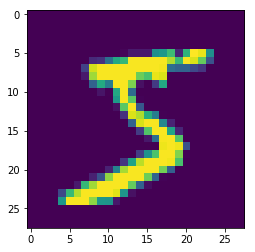

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
#plot the first image in the dataset
plt.imshow(X_train[0])

In [19]:
#check image shape
X_train[0].shape

(28, 28)

In [20]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [21]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(10, kernel_size=9, strides=(4, 4), activation='relu', input_shape=(28,28,1)))
#model.add(Conv2D(1, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 5, 5, 10)          820       
_________________________________________________________________
flatten_2 (Flatten)          (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2510      
Total params: 3,330
Trainable params: 3,330
Non-trainable params: 0
_________________________________________________________________


$ (3*3+1)*64=640 $ 

$ 32*(64*3*3+1)=18464 $

In [24]:
from keras.utils import plot_model
plot_model(model, to_file='model_3.png')

In [25]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
#train the model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 80s 1ms/step - loss: 1.3675 - acc: 0.6876 - val_loss: 0.3364 - val_acc: 0.9056
Epoch 2/5
60000/60000 [==============================] - 75s 1ms/step - loss: 0.2705 - acc: 0.9233 - val_loss: 0.2229 - val_acc: 0.9403
Epoch 3/5
60000/60000 [==============================] - 75s 1ms/step - loss: 0.2106 - acc: 0.9398 - val_loss: 0.1974 - val_acc: 0.9453
Epoch 4/5
60000/60000 [==============================] - 75s 1ms/step - loss: 0.1906 - acc: 0.9471 - val_loss: 0.1776 - val_acc: 0.9560
Epoch 5/5
60000/60000 [==============================] - 77s 1ms/step - loss: 0.1739 - acc: 0.9515 - val_loss: 0.2340 - val_acc: 0.9354


In [27]:
model.save('MNIST_Keras_3.h5')

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


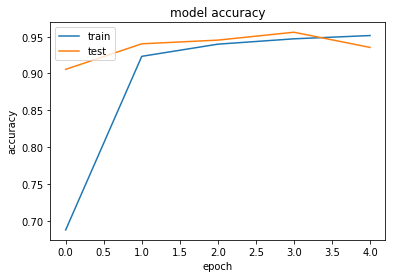

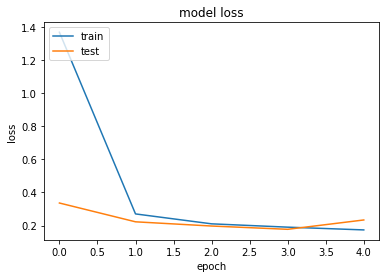

In [30]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()